> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMDB MOVIES

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>To complete my Data Analysis project I am using TMDb movies dataset.

This data set contains information about 10 thousand movies collected from The Movie Database (TMDb), including user ratings and revenue. It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc. 


## Question(s) for Analysis
#### 1. Movies which had most and least profit
#### 2. Movies with largest and lowest budgets
#### 3. Movies with most and least earned revenu.
#### 4. Movies with longest and shortest runtime values
#### 5. Average runtime of all the movies.
#### 6. In which year we had most no.of profitable movies.
#### 7. Successful genres (with respest to the profitable movies).
#### 8. Average budget  (with respest to the profitable movies)
#### 9. Average revenue  (with respest to the profitable movies)
#### 10. Average duration of the movie  (with respest to the profitable movies)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import csv

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [10]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# we import our data set
df = pd.read_csv('tmdb-movies.csv')
# reading first 5 rows of our data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
#in the next few cells we will learn more about our data
df.shape

(10866, 21)

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [19]:
#now we will delete some columns that won't be useful for our analysis
#creating a list of columns to be deleted
del_col=[ 'id', 'imdb_id', 'tagline', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns
df= df.drop(del_col,1)

#previewing the new dataset
df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7272\4171699327.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= df.drop(del_col,1)


,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [20]:
#now we only have 9 columns
df.shape

(10866, 9)

In [21]:
#now we will remove the duplicates from our dataset
df.drop_duplicates(keep ='first', inplace=True)

In [23]:
#in this step we will remove 0s and nans from budget and revenue

# creating a seperate list of revenue and budget column
temp_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[temp_list] = df[temp_list].replace(0, np.NAN)

#Removing all the row which has NaN value in temp_list 
df.dropna(subset = temp_list, inplace = True)

In [24]:
df.shape
#now we can see that the movies data after removing 0s and nans dropped from over 10866 to only 3854 movies

(3854, 9)

In [57]:
#now we will change the release_date columns to the standard date format
df.release_date = pd.to_datetime(df['release_date'])


In [28]:
#replacing 0 with NaN of runtime column in the dataset
df['runtime'] =df['runtime'].replace(0, np.NAN)

In [29]:
#printing the data type of the data set
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [30]:
change_type=['budget', 'revenue']
#changing data type
df[change_type]=df[change_type].applymap(np.int64)
#printing the changed information
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [31]:
#insert function with three parameters(index of the column in the dataset, name of the column, value to be inserted)
df.insert(2,'profit_earned',df['revenue']-df['budget'])

#now let's see the changes in our data set
df.head(2)

,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 : Movies which had most and least profit

In [32]:
#defining the function
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
release_year,2009,2010


### Here we can see that avatar has the most profit and The Warrior's Way has the least
### ------------------------------------------------------------------------

### Research Question 2  : Movies with largest and lowest budgets

In [33]:
# we will call the same function **calculate(column)** again for this analysis
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


### Here we can see that The Warrior's way has the largest budget and Lost & Found the smallest
### -------------------------------------------------------

### Research Question 3 : Movies with most and least earned revenue

In [34]:
# we will call the same function **calculate(column)** again for this analysis
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


### Here we can see that the movie avatar has the largest avenue and shattered glass the lowest
### -----------------------------------------------------------------

### Research Question 4 : Movies with longest and shortest runtime

In [35]:
# we will call the same function **calculate(column)** again for this analysis
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00
release_year,2010,2003


### Here we can See that the movie carlos has the longest runtime and Kid's Story has the shortest Runtime
### -------------------------------------------------------------------------

### Research Question 5 : Average runtime of the movies

In [36]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()

In [37]:
#calling above function
avg_fun('runtime')

109.22029060716139

### The averge runtime of a movie is approximately 109 minutes

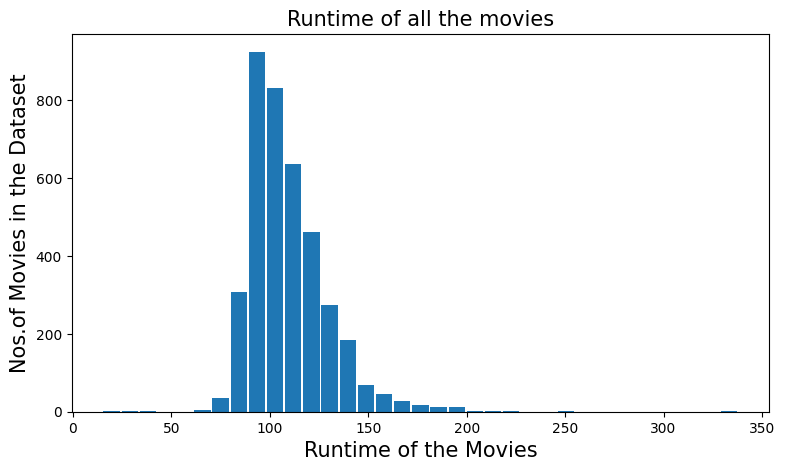

In [56]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plt.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plt.xlabel('Runtime of the Movies', fontsize = 15)
#On y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('Runtime of all the movies', fontsize=15)

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =35)
#displays the plot
plt.show()

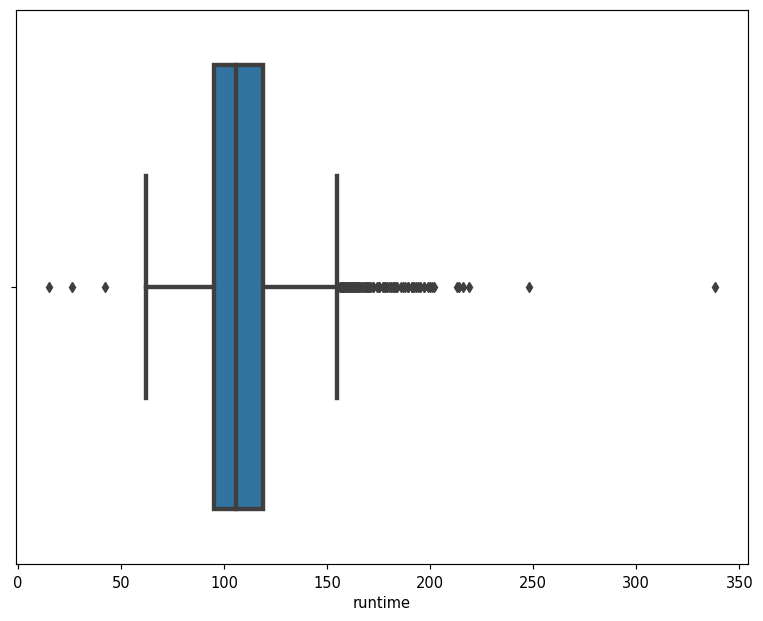

In [39]:
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 3)
#diplaying the plot
plt.show()


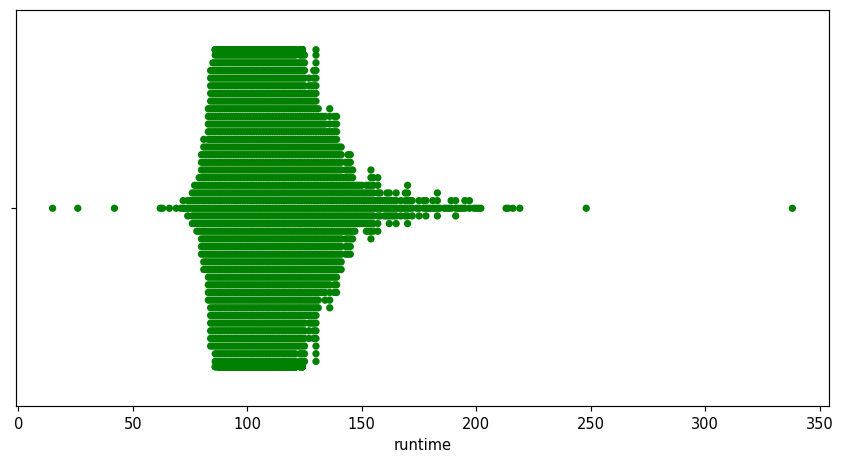

In [41]:
#The Second plots is the data points plot of runtime of movies

plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot
sns.swarmplot(df['runtime'], color = 'green')
#displaying the plot
plt.show()

In [68]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64


### By looking at both the plot and calculations, we can conclude that:
###  1- 25% of movies have a runtime of less than 95 minutes
###  2- 50% of movies have a runtime of less than 106 minutes. (median)
###  3- 75% of movies have a runtime of less than 117 minutes
### ----------------------------------------------------------------------------------

### Research Question 6 : Year of release and Profitability

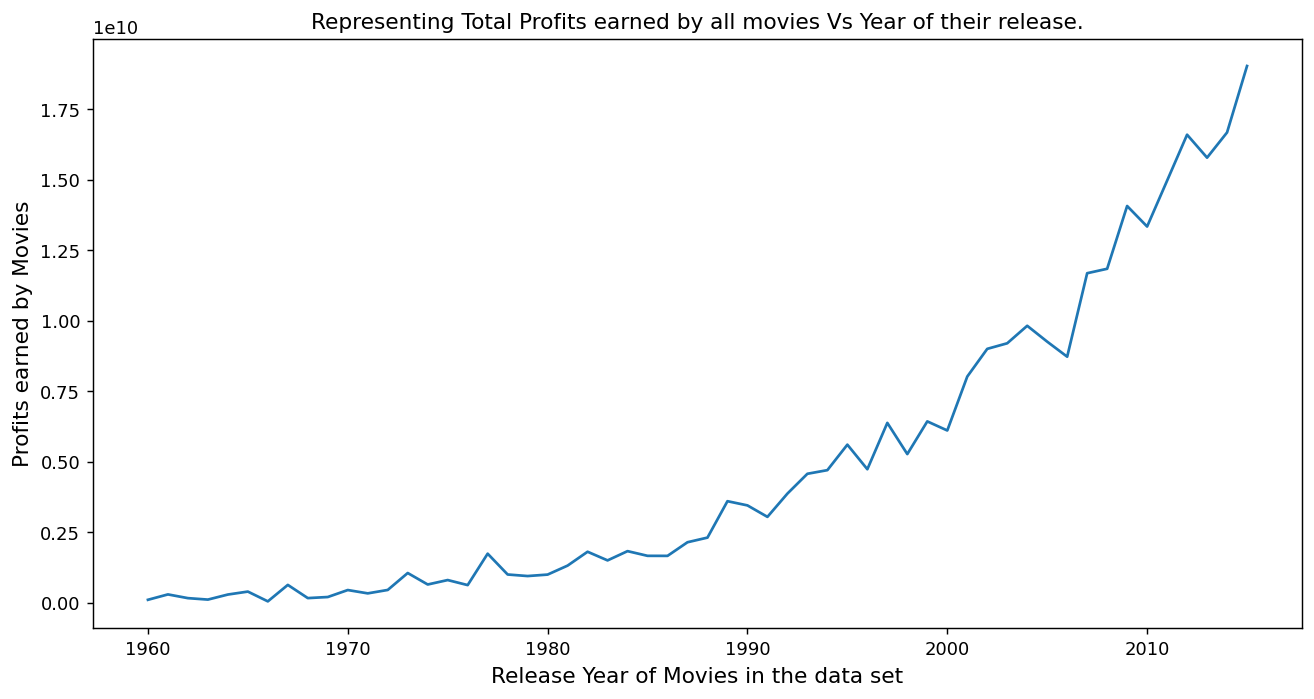

In [43]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit_earned'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

In [44]:
#To find that which year made the highest profit?
profits_year.idxmax()

2015

### so now we know that 2015 is the year which movies has highest profits
### -------------------------------------------------------------------------

### With respect to the profitable movies

### Before moving further we need to clean our data again. We will be considering only those movies who have earned a significant amount of profit.
### So lets fix this amount to 80 million dollar.

In [58]:
#selecting the movies having profit $50M or more
profit_data = df[df['profit_earned'] >= 80000000]

#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

#printing the changed dataset
profit_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [59]:
#counting the no.of rows in the new data base
len(profit_data)
# here we can see that our dataset on movies dropped from 3854 to 976 movies with over 80M profits

976

### ----------------------------------------------------------------------
### Research Question 7 : Succesful Genres

In [60]:
#function which will take any column as argument from and keep its track 
def data(column):
    #will take a column, and separate the string by '|'
    data = profit_data[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [61]:
#variable to store the retured value
count = data('genres')
#printing top 5 values
count.head()

Comedy       354
Action       352
Drama        326
Adventure    303
Thriller     275
dtype: int64

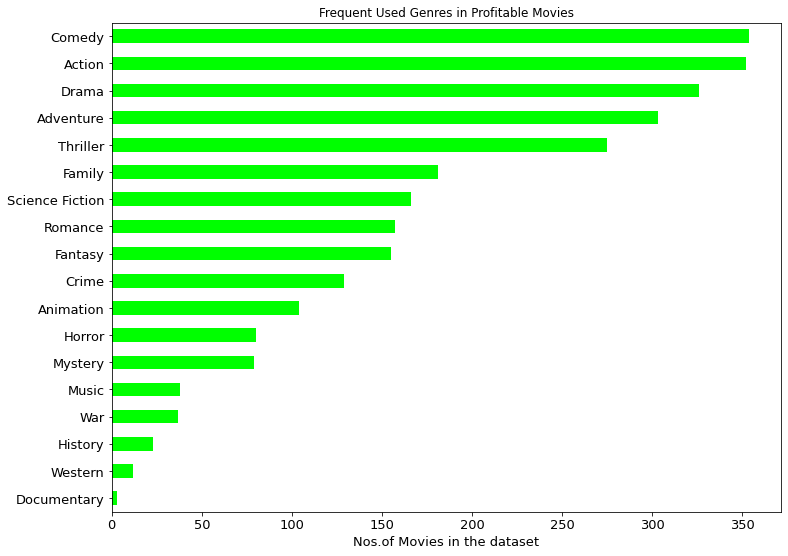

In [62]:
#lets plot the points in descending order top to bottom as we have data in same format.
count.sort_values(ascending = True, inplace = True)

#ploting
lt = count.plot.barh(color = '#00FF00', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Nos.of Movies in the dataset', color = 'black', fontsize = '13')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

### Here we can see the the comedy genre is the most successful with the action genre not far behind as the second most and drama comes third
### -------------------------------------------------------------------------

### Research Question 8 : Average Budget of the movies

In [63]:
#New function to find average 
def profit_avg(column):
    return profit_data[column].mean()

In [64]:
# calling the above function for budget
profit_avg('budget')

69334187.61577868

### ---------------------------------------------------------------
### Research Question 9 : Average revenue of the movies

In [65]:
# calling the above function for revenue
profit_avg('revenue')

312413338.8606557

### -------------------------------------------------------------------
### Research Question 10 : Average Runtime of the movies

In [67]:
# calling the above function for 
profit_avg('runtime')

115.19979508196721

### ------------------------------------------------------------------------------

<a id='conclusions'></a>
## Conclusions

### We came out with some very interesting facts about movies. After this analysis we can conclude following:

 ### In order for a movie to be successful:
 #### 1- Average Budget must be around 69 millon dollar
 #### 2- Average duration of the movie must be 106 minutes 
 #### 4- Genre must be : Comedy, Action or Drama.
### -------------------------------------------------------------------------------------------------------
## Limitations
 #### as for the limitation we did our analysis based on movies which made profit over 80 Million to make our analysis on most profitable movies and we are still not sure about the currency used in the budget or revnue columns so we asuumed it was in USD as it is the most used currency around the world, however we are not sure that this data is completely correct but we made sure that our analysis is as precise as possible

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])